<a href="https://colab.research.google.com/github/JackSandford/ECK/blob/main/Self_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing data

In [14]:
import os
import pandas as pd
import json 
from google.colab import drive
import matplotlib.pyplot as plt

def mount_drive():
  drive.mount('/content/drive', force_remount=True)
  project_dir = "/content/drive/MyDrive/OneHourOfData"
  return project_dir

def unmount_drive():
  drive.flush_and_unmount()
  print('Drive Unmounted')

def get_file_names(project_dir):
  path = os.path.join(os.getcwd(),project_dir)
  filenames = [os.path.join(path,i) for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]
  return filenames


project_dir = mount_drive()

filenames = get_file_names(project_dir)
filenames = filenames[:6]

Mounted at /content/drive


In [2]:
regs = pd.read_csv('https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/bus_regs.csv')
ohod = pd.read_json('/content/drive/MyDrive/OneHourOfData/busdata_22-09-07_08-07-48.json')

Creating a pie chart showing percentages of each type of bus

([<matplotlib.patches.Wedge at 0x7fa50f047a90>,
 [Text(0.8540169897067765, 0.6932928539168537, 'EURO III - 21.71%'),
  Text(-0.09364721142351057, 1.0960064779884289, 'EURO IV - 9.3%'),
  Text(-0.9458602806525842, 0.561558838843994, 'EURO V - 20.93%'),
  Text(0.0669304977830421, -1.0979618884399014, 'EURO VI - 48.06%')])

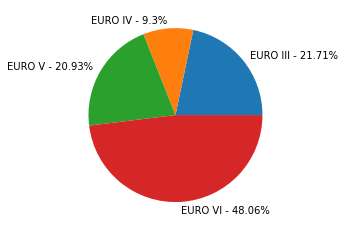

In [38]:
def types_of_buses():
  euro3buses = []
  euro4buses = []
  euro5buses = []
  euro6buses = []
  euro3regslist = []
  euro4regslist = []
  euro5regslist = []
  euro6regslist = []
  mvj = pd.json_normalize(ohod.MonitoredVehicleJourney)
  euro3regs = regs[regs['Emission Class'] == 'EURO III']
  for reg in euro3regs['Last tracked']:
    euro3regslist.append(reg)
  euro4regs = regs[regs['Emission Class'] == 'EURO IV']
  for reg in euro4regs['Last tracked']:
    euro4regslist.append(reg)
  euro5regs = regs[regs['Emission Class'] == 'EURO V']
  for reg in euro5regs['Last tracked']:
    euro5regslist.append(reg)
  euro6regs = regs[regs['Emission Class'] == 'EURO VI']
  for reg in euro6regs['Last tracked']:
    euro6regslist.append(reg)
  euro3buses = mvj[mvj['VehicleRef'].isin(euro3regslist)]
  euro4buses = mvj[mvj['VehicleRef'].isin(euro4regslist)]
  euro5buses = mvj[mvj['VehicleRef'].isin(euro5regslist)]
  euro6buses = mvj[mvj['VehicleRef'].isin(euro6regslist)]
  numbersbuses = (len(euro3buses), len(euro4buses), len(euro5buses), len(euro6buses))
  total_length = len(euro3buses) + len(euro4buses) + len(euro5buses) + len(euro6buses)
  percentage3 = round((len(euro3buses) / total_length) * 100, 2)
  percentage4 = round((len(euro4buses) / total_length) * 100, 2)
  percentage5 = round((len(euro5buses) / total_length) * 100, 2)
  percentage6 = round((len(euro6buses) / total_length) * 100, 2)
  keys = (('EURO III - {}%'.format(percentage3)), ('EURO IV - {}%'.format(percentage4)), ('EURO V - {}%'.format(percentage5)), ('EURO VI - {}%'.format(percentage6)))
  return plt.pie(numbersbuses, labels = keys)
  #return percentage3
types_of_buses()

#display(euro3regs)

In [ ]:
def euro3only():
  for line in zip(regs['Emission Class'],regs['Last tracked']):
    if line[0] == 'EURO III':
      to_list.append(line[1])
  return to_list